# Airline Loyalty Program

Customer loyalty is the cornerstone of success in the highly competitive airline industry. This project aims to fortify the airline company's loyalty program by performing churn analysis and customer segmentation. The goal is to identify patterns among churned customers and tailor the loyalty program to meet the specific needs of each customer segment, thereby strengthening the company's market position.

The airline industry, being both competitive and lucrative, presents a unique challenge for analysis. With airlines operating on a global scale, analyzing customer behavior can provide insights that are applicable across various markets and demographics. This project leverages the complexities of the industry to test and enhance analytical skills, combining knowledge from various domains to deliver effective results.

By conducting this analysis, we aim to enable data-driven decision-making within the airline company. The insights obtained will help us understand customer preferences and behavior better, allowing us to cater to them more effectively. This approach will foster long-term loyalty and provide a competitive edge in the airline market.

> The Dashboard for this project is available [here]()

### Imports

In [3]:
import uuid
import warnings
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

warnings.filterwarnings("ignore")

### Loading Data

The dataset describes the travel activity of customers both enrolled in the company’s loyalty program and those who are not. This information includes customer information, signups, enrolment, and cancellation details. It consists of two primary datasets: Customer Activity and Customer History. In total, the dataset contains over 400,000 records and 26 features.

[Data Source](https://www.mavenanalytics.io/data-playground?order=date_added%2Cdesc&page=3&pageSize=5)

##### Customer Activity

In [12]:
Activity = pd.read_csv(r"C:\Users\joels\Desktop\DA Projects\Airline Loyalty Program\Datasets - Raw\Customer Flight Activity.csv")
Activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
135343,106838,2017,9,7,7,14,2058,205.0,0,0
235730,952696,2018,2,0,0,0,0,0.0,0,0
203406,131761,2018,1,11,5,16,2128,212.0,0,0
358424,287343,2018,10,11,4,15,1845,184.0,0,0
95735,307631,2018,8,0,0,0,0,0.0,0,0


##### Customer History

In [13]:
History = pd.read_csv(r"C:\Users\joels\Desktop\DA Projects\Airline Loyalty Program\Datasets - Raw\Customer Loyalty History.csv")
History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
472,256323,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,87635.0,Married,Star,4669.23,Standard,2014,11,NaN,NaN
7802,541000,Canada,Ontario,London,M5B 3E4,Male,College,NaN,Married,Nova,7736.46,Standard,2014,6,NaN,NaN
3669,112142,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,93073.0,Single,Aurora,16272.74,Standard,2015,7,NaN,NaN
8158,795840,Canada,Ontario,London,M5B 3E4,Male,College,NaN,Single,Aurora,11436.43,2018 Promotion,2018,3,2018.0,4.0
14082,156870,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,46831.0,Married,Star,6047.03,Standard,2018,7,NaN,NaN


### High level EDA
##### Customer Activity

In [14]:
# Checking Dimensions
Activity.shape

(405624, 10)

In [15]:
# Checking Nulls
Activity.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [16]:
# Checking Distribution
Activity.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


* From the initial EDA, it is understood that the data obtained represents activity in the period of **one year** (2017-2018). 
* There also doesn't seem to be any major outliers as all distributions appear **normal**.

##### Customer History

In [17]:
# Checking Distribution
History.shape

(16737, 16)

In [18]:
# Checking Nulls
History.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [19]:
print(f"Missing Salary: {(History.Salary.isna().sum()/History.shape[0])*100:.2f} %")
print(f"Missing Cancellation Month/Year: {(History['Cancellation Month'].isna().sum()/History.shape[0])*100:.2f} %")

Missing Salary: 25.32 %
Missing Cancellation Month/Year: 87.65 %


* 25% of **_Salary_** is missing, we have to handle it with methods like substituting *mean/median*
* 87% of **_Cancellation Month_** & **_Cancellation Year_** is missing, This is not an issue because we know that if **_Cancellation Month & Cancellation Year_** is null, the customer is still **active**. Therefore we can use it to create a **_Churn_** column for modelling.

In [20]:
# Checking Distribution
History.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


* **_Salary_** has negative values, this is not possible and makes no logical sense. We have to change them to positive values

### Data Cleaning & Transformations

##### Customer Activity

In [21]:
### Activity Dataframe needs an unique identifier, which will assist when merging the two dataframes
Activity['Activity ID'] = [str(uuid.uuid4()) for _ in range(len(Activity))]
Activity['Activity ID'].unique().shape

(405624,)

In [22]:
Activity.sample(5).T

,172493,14537,298135,25107,104233
Loyalty Number,286614,872341,675956,537887,252450
Year,2017,2017,2018,2017,2017
Month,11,1,6,2,7
Flights Booked,0,0,8,0,15
Flights with Companions,0,0,8,0,0
Total Flights,0,0,16,0,15
Distance,0,0,4896,0,5400
Points Accumulated,0.0,0.0,489.0,0.0,540.0
Points Redeemed,0,0,0,0,0
Dollar Cost Points Redeemed,0,0,0,0,0


##### Customer History

In [23]:
History.Education.value_counts()

Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: Education, dtype: int64

In [24]:
# All Customers with college education do not have salaries
History[History.Salary.isna()].Education.value_counts()

College    4238
Name: Education, dtype: int64

In [25]:
# This maybe due to some lingering pattern, thus replacing na with 0
History.Salary.fillna(0, inplace=True)

In [26]:
History[History.Salary<0]["Education"].value_counts()

Bachelor                19
High School or Below     1
Name: Education, dtype: int64

In [27]:
# No pattern among these negative values, therefore we take the positive values of these salaries
History.Salary = History.Salary.abs()

In [28]:
History.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,59264.647308,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,45746.427785,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,0.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,0.000000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,63654.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,82940.000000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [29]:
History.sample(5).T

,6786,1597,10698,392,512
Loyalty Number,321795,713981,583272,909385,984636
Country,Canada,Canada,Canada,Canada,Canada
Province,Ontario,Quebec,Quebec,Ontario,Alberta
City,Thunder Bay,Montreal,Montreal,Sudbury,Calgary
Postal Code,K8T 5M5,H2Y 2W2,H2T 2J6,M5V 1G5,T3E 2V9
Gender,Male,Male,Male,Male,Female
Education,Bachelor,College,Bachelor,High School or Below,Bachelor
Salary,103197.0,0.0,68957.0,44510.0,59023.0
Marital Status,Married,Single,Married,Single,Married
Loyalty Card,Nova,Aurora,Star,Star,Star


### Merge the two dataframes

Here we merge the History table on our Activity table, as the Activity table is more likely our facts table, while the History table consists of our dimensions.

In [30]:
df = pd.merge(Activity, History, on="Loyalty Number", how="left")
df.sample(5).T

,238763,148601,7025,54795,129535
Loyalty Number,982017,811430,474921,319671,697323
Year,2018,2017,2017,2017,2017
Month,4,9,1,4,8
Flights Booked,1,0,8,0,0
Flights with Companions,0,0,3,0,0
Total Flights,1,0,11,0,0
Distance,1529,0,2211,0,0
Points Accumulated,164.16,0.0,221.0,0.0,0.0
Points Redeemed,0,0,0,0,0
Dollar Cost Points Redeemed,0,0,0,0,0


In [31]:
df.shape

(405624, 26)

In [32]:
# Adding a churn column
df['Churn'] = df["Cancellation Month"].apply(lambda x:1 if pd.notnull(x) else 0)
df.Churn.value_counts()

0    355560
1     50064
Name: Churn, dtype: int64

In [33]:
# Exporting the data for EDA in tableau
# df.to_csv("Datasets - Cleaned/Cleaned_dataset.csv")

### Correlation

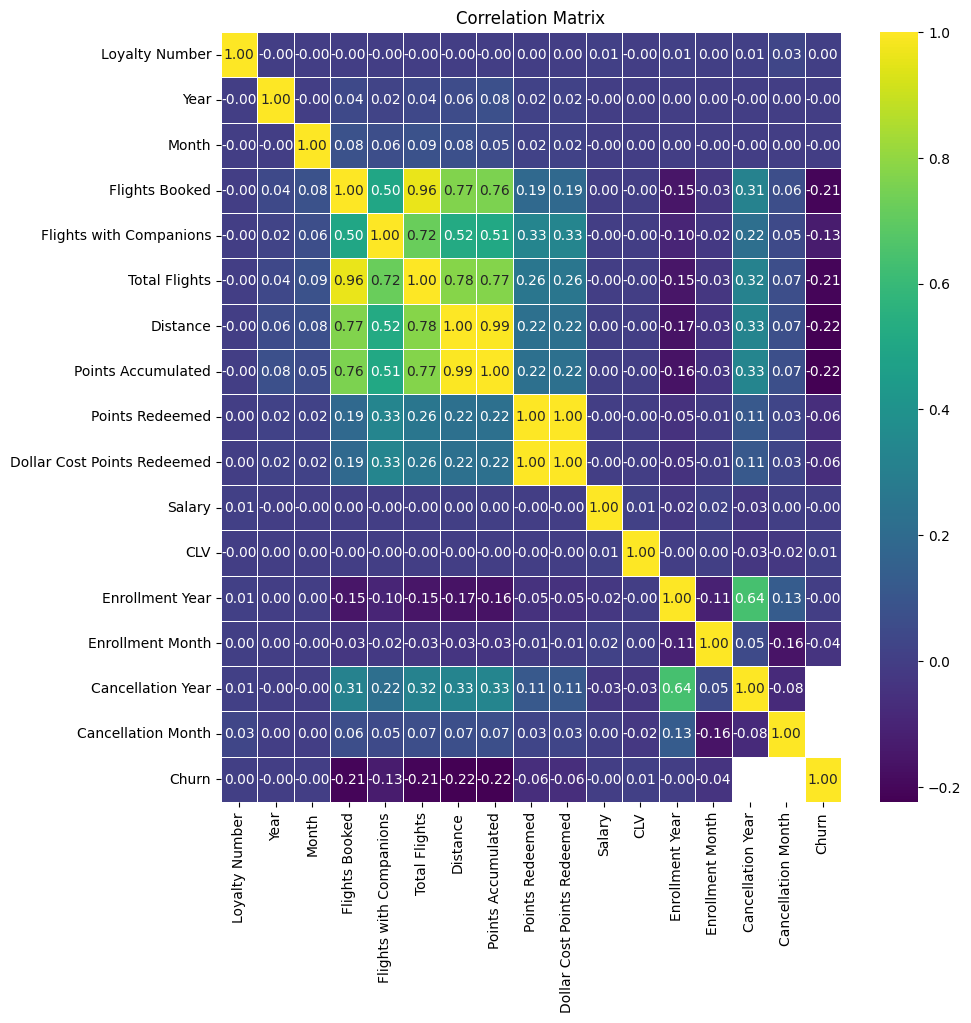

In [34]:
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Encoding Variables

Now the variables need to be encoded in order to build our model.

In [35]:
df.select_dtypes(include=['object']).columns

Index(['Activity ID', 'Country', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

Utilizing manual encoding for features with low factors

In [36]:
df.Country = df.Country.replace({"Canada":1})
df.Gender = df.Gender.replace({"Male":0,"Female":1})
df.Education = df.Education.replace({'Bachelor':0, 'College':1, 'Master':2, 'High School or Below':3, 'Doctor':4})
df['Marital Status'] = df['Marital Status'].replace({'Single':0,"Married":1,"Divorced":2})
df['Loyalty Card'] = df['Loyalty Card'].replace({'Star':0,'Nova':1,'Aurora':2})
df['Enrollment Type'] = df['Enrollment Type'].replace({'Standard':0,'2018 Promotion':1})

In [37]:
df.select_dtypes(include=['object']).columns

Index(['Activity ID', 'Province', 'City', 'Postal Code'], dtype='object')

Using Category Encoders for the last few features with high factors

In [38]:
encoder = ce.CountEncoder(cols=["Province",'City','Postal Code'])
df = encoder.fit_transform(df)

In [39]:
df.select_dtypes(include=['object']).columns

Index(['Activity ID'], dtype='object')

In [40]:
backup_df = df

## Modelling - Churn Prediction
### Functions for Metrics

This function will take the predictions made by the model and return the required metrics. This is used only for ease of comparing models.

In [41]:
### Function to generate Metrics
def show_metrics(predictions, flag=0):
    if flag is 1:
        return accuracy_score(y_test, predictions), recall_score(y_test, predictions), f1_score(y_test, predictions)
    if flag is 0:
        print("Accuracy: {}".format(accuracy_score(y_test, predictions)))
        print("Recall: {}".format(recall_score(y_test, predictions)))
        print("F1 Score: {}".format(f1_score(y_test, predictions)))

### Splitting Data

In [42]:
### Prepping for Modelling 
X = df.drop(['Churn','Activity ID','Cancellation Month','Cancellation Year','Loyalty Number'], axis=1)
y = df.Churn

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=823)

### Over Sampling the data

Since our majority of the customers have not churned, we have data imbalance. This can skew the results or lead to overfitting. Therefore we need to Over Sample to balance our dataset.

In [44]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=823)
X_train, y_train = ros.fit_resample(X_train, y_train)

### Model Testing

Now we Test Different models, namely Logistic Regression, AdaBoost Classifier, Random Forest Classifier, and Decision Tree Classifier. In this way, the best performing model can be identified and can later be subjected to hyperparameter tuning.

In [45]:
model = LogisticRegression(max_iter=1000, random_state=823)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
show_metrics(predictions)

Accuracy: 0.5713528505392912
Recall: 0.8611968535298218
F1 Score: 0.3321938853894607


In [46]:
model = AdaBoostClassifier(n_estimators=120,random_state=823)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
show_metrics(predictions)

Accuracy: 0.7351617873651772
Recall: 0.8357064622124863
F1 Score: 0.43860886833372525


In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=823)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
show_metrics(predictions)

Accuracy: 0.9848875192604006
Recall: 0.88021507517674
F1 Score: 0.9351528615254416


In [48]:
# Testing Decsion Tree to check if it performs better
model = DecisionTreeClassifier(random_state=823)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
show_metrics(predictions)

Accuracy: 0.9836671802773498
Recall: 0.939659464303495
F1 Score: 0.9344026932026338


* From the Model testing, the **DecisionTree Classifier** has the highest metrics (Recall score). Therefore it must be subject to Hyperparameter tuning to tune the optimal model.
* **Recall Score** is the metric of choice as it ensures that no customer that will churn is missed out by the model 

### Finalizing Model - Hyperparameter Tuning

In [49]:
# Hyperparameter tuning - Decision Tree
model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [40]:
### Building the best model
model = DecisionTreeClassifier(**best_params, random_state=823)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
show_metrics(predictions)

Accuracy: 0.9842218798151001
Recall: 0.9423479040127452
F1 Score: 0.9366587490102929


In [41]:
### Feature Importances
FI = pd.DataFrame({"Columns": X_train.columns, "Feature Importances":model.feature_importances_})
FI.sort_values(by="Feature Importances", ascending=False, inplace=True)
FI

,Columns,Feature Importances
18,CLV,0.193423
20,Enrollment Year,0.154017
6,Points Accumulated,0.144388
15,Salary,0.133044
21,Enrollment Month,0.093361
12,Postal Code,0.086452
11,City,0.044737
10,Province,0.031019
16,Marital Status,0.025785
17,Loyalty Card,0.022667


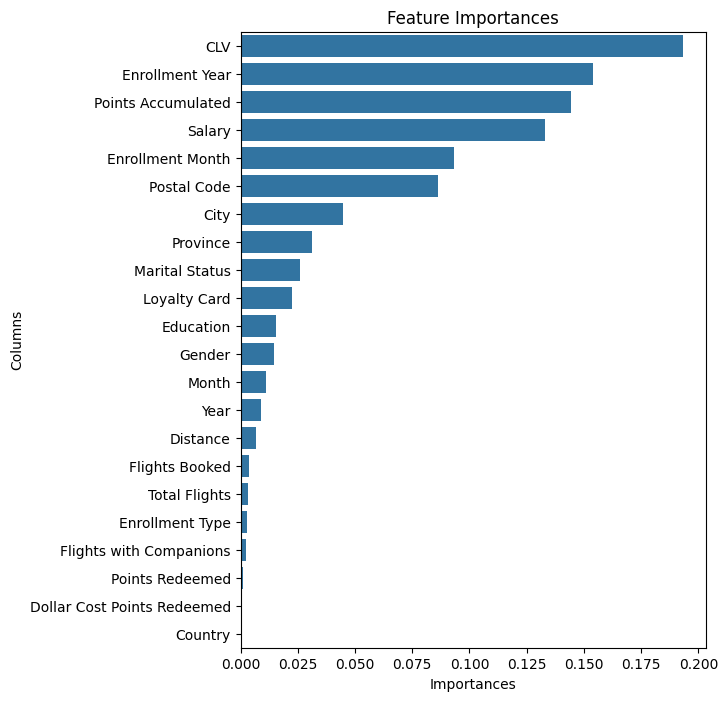

In [42]:
plt.figure(figsize=(6,8))
sns.barplot(FI, x='Feature Importances', y="Columns")
plt.title("Feature Importances")
plt.xlabel("Importances")
plt.ylabel("Columns")
plt.show()

In [43]:
## Dropping features that do not have significant Importances

feature = X_train.drop(["Flights Booked",'Total Flights','Enrollment Type','Flights with Companions','Points Redeemed','Dollar Cost Points Redeemed','Country'], axis=1)
feature_test = X_test.drop(["Flights Booked",'Total Flights','Enrollment Type','Flights with Companions','Points Redeemed','Dollar Cost Points Redeemed','Country'], axis=1)

model = DecisionTreeClassifier(**best_params, random_state=823)
model.fit(feature, y_train)
predictions = model.predict(feature_test)
show_metrics(predictions)

Accuracy: 0.9872542372881355
Recall: 0.9530020910086627
F1 Score: 0.9487509912767644


> We built a Decision Tree Classifier with **0.9530** Recall Score and **0.9487** F1 Score.
> With this we can predict the majority (95%) of those who churn.

## Modelling - Customer Segmentation

### RFM

In [33]:
seg_df = backup_df

In [34]:
# Calculating Frequency and Monetary for Segmentation
frequency = seg_df.groupby('Loyalty Number')['Total Flights'].sum()
monetary = seg_df.groupby('Loyalty Number')['CLV'].sum()

In [35]:
rfm_matrix = pd.DataFrame({'Frequency': frequency, 'Monetary': monetary})

# Scaling the Matrix
scaler = StandardScaler()
rfm_matrix_scaled = scaler.fit_transform(rfm_matrix)

In [36]:
score = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=823)
    kmeans.fit(rfm_matrix_scaled)
    score.append(kmeans.inertia_)

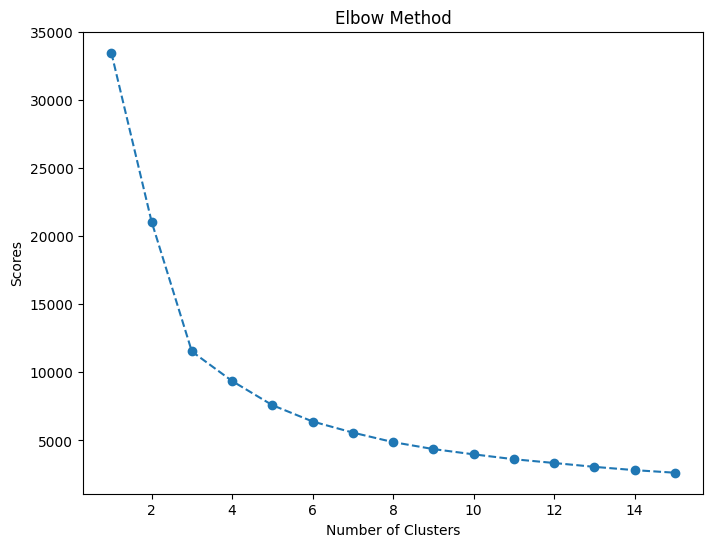

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), score, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.show()

In [38]:
k = 3
kmeans_rfm = KMeans(n_clusters=k, random_state=823)
rfm_matrix['Cluster'] = kmeans_rfm.fit_predict(rfm_matrix_scaled)

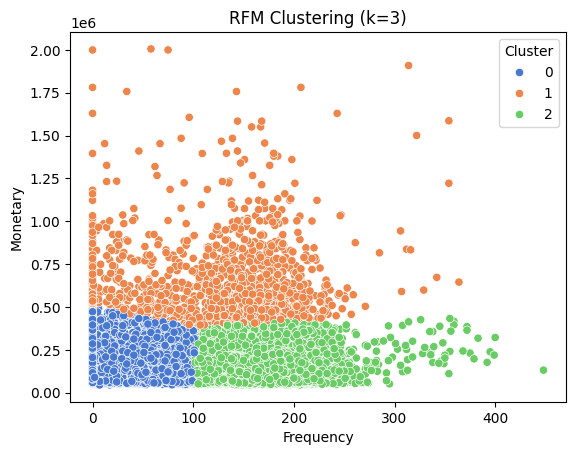

In [39]:
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_matrix, palette='muted')
plt.title(f'RFM Clustering (k={k})')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
#rfm_matrix.to_csv("RFM Matrix.csv")

> All of the Customers can be segmented into three segments, namely: 
> * *Low Frequent-Low Value Flyers*
> * *High Frequent - Low Value Flyers*
> * *High Value Flyers*

> We can Focus on the Low Value flyers, as they are the major demographic, by incentivizing them to fly often and therefore increasing Overall Revenue.